In [3]:
# Load Libraries
library(Seurat)
library(msigdbr)
library(fgsea)
library(dplyr)
library(data.table)
library(ggplot2)
library(EnhancedVolcano)

# Set Working Directory
setwd("../")

ERROR: Error in library(org.Hs.eg.db): there is no package called ‘org.Hs.eg.db’


# Load Data

In [2]:
# Load Data
data <- readRDS("GBMProject/GBMOrganoid/Checkpoints/1_DataPreprocessing.rds")

# Gene Set Enrichment Analysis

## Find Differentially Expressed Genes

In [3]:
Idents(data) <- "HTO_maxID"

markers.WT.PRO <- FindMarkers(object = data, test.use = "wilcox", ident.1 = "PRO", ident.2 = "WT", logfc.threshold = 1.0)
markers.WT.PRO$gene <- rownames(markers.WT.PRO)
write.csv(markers.WT.PRO, file = "GBMProject/GBMOrganoid/GeneLists/HTOMarkers_Wilcox_WT-PRO_std.csv")

markers.WT.MES <- FindMarkers(object = data, test.use = "wilcox", ident.1 = "MES", ident.2 = "WT", logfc.threshold = 1.0)
markers.WT.MES$gene <- rownames(markers.WT.MES)
write.csv(markers.WT.MES, file = "GBMProject/GBMOrganoid/GeneLists/HTOMarkers_Wilcox_WT-MES_std.csv")

In [4]:
genelist.pro = markers.WT.PRO$avg_log2FC
names(genelist.pro) = as.character(markers.WT.PRO$gene)
genelist.pro = sort(genelist.pro, decreasing = T)

genelist.mes = markers.WT.MES$avg_log2FC
names(genelist.mes) = as.character(markers.WT.MES$gene)
genelist.mes = sort(genelist.mes, decreasing = T)

## GSEA using fgsea package

In [5]:
pathways.h <- msigdbr(species = "human", category = "H") #c("H-hallmark gene sets","C5","C6","C8"))
pathways.h <- split(x = pathways.h$gene_symbol, f = pathways.h$gs_name)

pathways.c2 <- msigdbr(species = "human", category = "C2") #c("H","C2-curated gene sets,"C5","C6","C8"))
pathways.c2 <- split(x = pathways.c2$gene_symbol, f = pathways.c2$gs_name)

pathways.c5 <- msigdbr(species = "human", category = "C5") #c("H","C5-ontology gene sets","C6","C8"))
pathways.c5 <- split(x = pathways.c5$gene_symbol, f = pathways.c5$gs_name)

pathways.c6 <- msigdbr(species = "human", category = "C6") #c("H","C5","C6-oncogenic gene sets","C8"))
pathways.c6 <- split(x = pathways.c6$gene_symbol, f = pathways.c6$gs_name)

pathways.c8 <- msigdbr(species = "human", category = "C8") #c("H","C5","C6","C8-cell type gene sets"))
pathways.c8 <- split(x = pathways.c8$gene_symbol, f = pathways.c8$gs_name)

In [6]:
# PRO eGBO vs WT
fgsea_pro.h <- fgsea(pathways.h, genelist.pro, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.h, file="GBMProject/GBMOrganoid/GSEA/GSEA_H_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.h, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro_h.rds")

fgsea_pro.c2 <- fgsea(pathways.c2, genelist.pro, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c2, file="GBMProject/GBMOrganoid/GSEA/GSEA_C2_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c2, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro_c2.rds")

fgsea_pro.c5 <- fgsea(pathways.c5, genelist.pro, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c5, file="GBMProject/GBMOrganoid/GSEA/GSEA_C5_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c5, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro_c5.rds")

fgsea_pro.c6 <- fgsea(pathways.c6, genelist.pro, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c6, file="GBMProject/GBMOrganoid/GSEA/GSEA_C6_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c6, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro_c6.rds")

fgsea_pro.c8 <- fgsea(pathways.c8, genelist.pro, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c8, file="GBMProject/GBMOrganoid/GSEA/GSEA_C8_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c8, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro_c8.rds")

# MES eGBO vs WT
fgsea_mes.h <- fgsea(pathways.h, genelist.mes, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_mes.h, file="GBMProject/GBMOrganoid/GSEA/GSEA_H_MES-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_mes.h, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/mes_h.rds")

fgsea_mes.c2 <- fgsea(pathways.c2, genelist.mes, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_mes.c2, file="GBMProject/GBMOrganoid/GSEA/GSEA_C2_MES-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_mes.c2, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/mes_c2.rds")

fgsea_mes.c5 <- fgsea(pathways.c5, genelist.mes, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_mes.c5, file="GBMProject/GBMOrganoid/GSEA/GSEA_C5_MES-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_mes.c5, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/mes_c5.rds")

fgsea_mes.c6 <- fgsea(pathways.c6, genelist.mes, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_mes.c6, file="GBMProject/GBMOrganoid/GSEA/GSEA_C6_MES-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_mes.c6, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/mes_c6.rds")

fgsea_mes.c8 <- fgsea(pathways.c8, genelist.mes, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_mes.c8, file="GBMProject/GBMOrganoid/GSEA/GSEA_C8_MES-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_mes.c8, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/mes_c8.rds")

## Gene set co-regulation analysis

In [7]:
# Extract gene expression matrix
counts_matrix <- as.matrix(data[["RNA"]]$counts)

In [8]:
# Run GESECA
set.seed(123)
gesecaRes.h <- geseca(pathways.h, counts_matrix, minSize = 5, maxSize = 500, center = FALSE, eps=0.0)
fwrite(gesecaRes.h, file="GBMProject/GBMOrganoid/GSEA/GSECA_H.csv", sep=",", sep2=c("", " ", ""))
saveRDS(gesecaRes.h, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/geseca_h.rds")

gesecaRes.c2 <- geseca(pathways.c2, counts_matrix, minSize = 5, maxSize = 500, center = FALSE, eps=0.0)
fwrite(gesecaRes.c2, file="GBMProject/GBMOrganoid/GSEA/GSECA_C2.csv", sep=",", sep2=c("", " ", ""))
saveRDS(gesecaRes.c2, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/geseca_c2.rds")

gesecaRes.c5 <- geseca(pathways.c5, counts_matrix, minSize = 5, maxSize = 500, center = FALSE, eps=0.0)
fwrite(gesecaRes.c5, file="GBMProject/GBMOrganoid/GSEA/GSECA_C5.csv", sep=",", sep2=c("", " ", ""))
saveRDS(gesecaRes.c5, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/geseca_c5.rds")

gesecaRes.c6 <- geseca(pathways.c6, counts_matrix, minSize = 5, maxSize = 500, center = FALSE, eps=0.0)
fwrite(gesecaRes.c6, file="GBMProject/GBMOrganoid/GSEA/GSECA_C6.csv", sep=",", sep2=c("", " ", ""))
saveRDS(gesecaRes.c6, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/geseca_c6.rds")

gesecaRes.c8 <- geseca(pathways.c5, counts_matrix, minSize = 5, maxSize = 500, center = FALSE, eps=0.0)
fwrite(gesecaRes.c8, file="GBMProject/GBMOrganoid/GSEA/GSECA_C8.csv", sep=",", sep2=c("", " ", ""))
saveRDS(gesecaRes.c8, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/geseca_c8.rds")

# Volcano Plots

In [9]:
Idents(data) <- "HTO_maxID"

markers.WT.PRO <- FindMarkers(object = data, test.use = "wilcox", ident.1 = "PRO", ident.2 = "WT", logfc.threshold = 0)
markers.WT.PRO$gene <- rownames(markers.WT.PRO)
write.csv(markers.WT.PRO, file = "GBMProject/GBMOrganoid/GeneLists/HTOMarkers_Wilcox_WT-PRO_volcano.csv")

markers.WT.MES <- FindMarkers(object = data, test.use = "wilcox", ident.1 = "MES", ident.2 = "WT", logfc.threshold = 0)
markers.WT.MES$gene <- rownames(markers.WT.MES)
write.csv(markers.WT.MES, file = "GBMProject/GBMOrganoid/GeneLists/HTOMarkers_Wilcox_WT-MES_volcano.csv")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


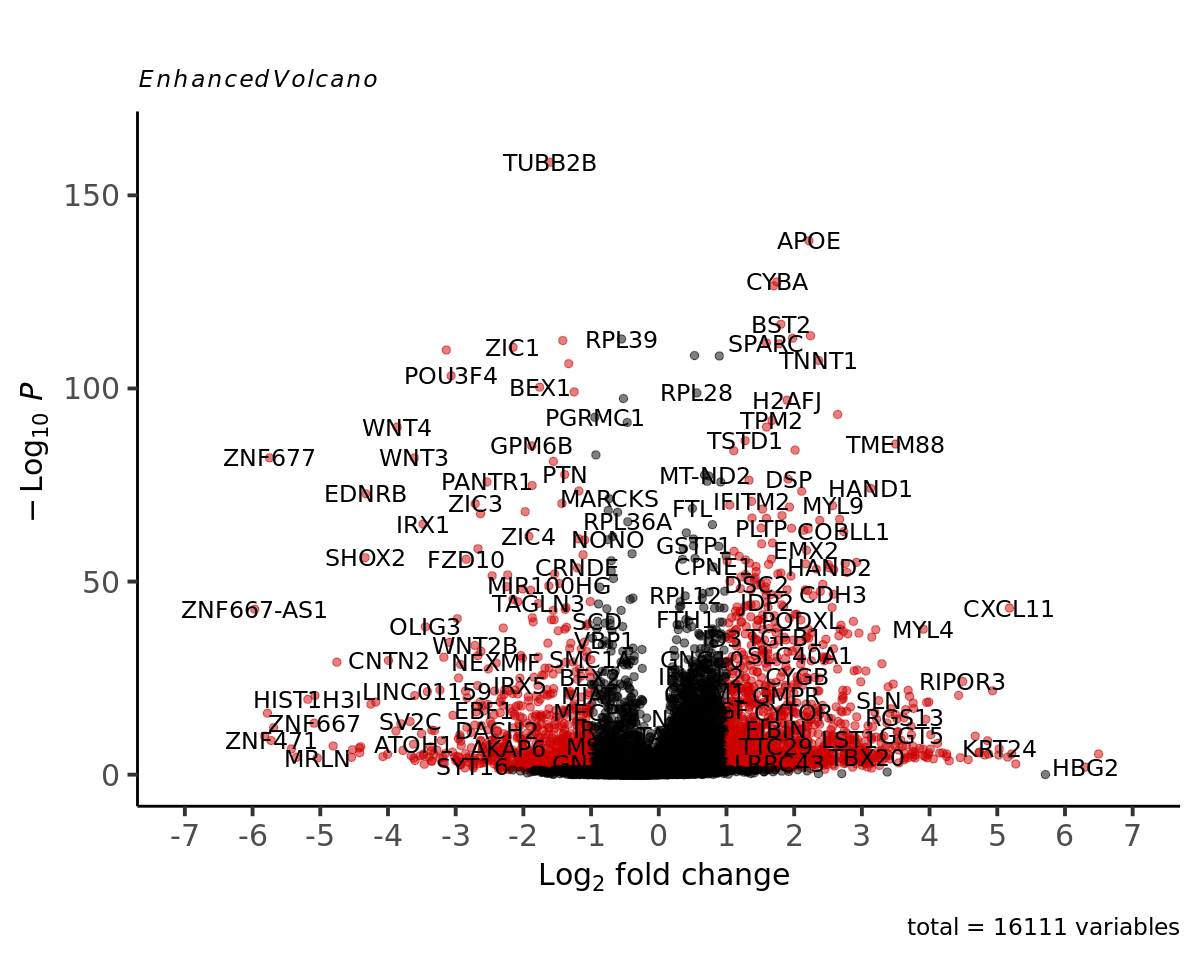

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8)

EnhancedVolcano(markers.WT.PRO, markers.WT.PRO$gene, x ="avg_log2FC", y ="p_val",lab = markers.WT.PRO$gene, title = '', #selectLab = c('EMX2'),
                FCcutoff=1,pCutoff=.05,cutoffLineType = 'blank',col=c('black', 'black', 'black', 'red3'), pointSize = 2.0,
                gridlines.major = FALSE,gridlines.minor = FALSE)+ NoLegend() + ggplot2::coord_cartesian(xlim=c(-7, 7)) + 
                ggplot2::scale_x_continuous(breaks=seq(-7,7, 1))

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


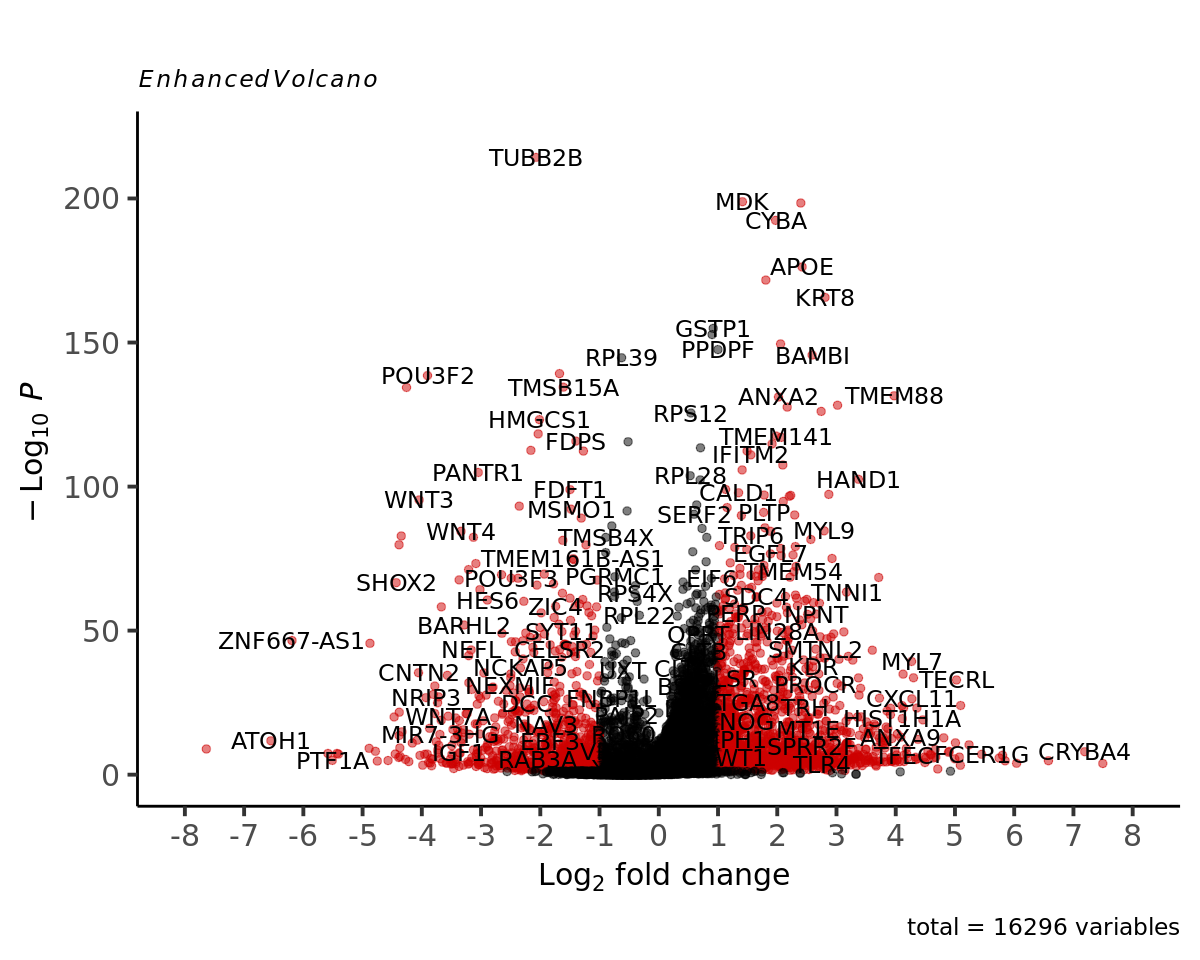

In [13]:
options(repr.plot.width = 10, repr.plot.height = 8)

EnhancedVolcano(markers.WT.MES, markers.WT.MES$gene, x ="avg_log2FC", y ="p_val",lab = markers.WT.MES$gene, title = '', #selectLab = c('EMX2'),
                FCcutoff=1,pCutoff=.05,cutoffLineType = 'blank',col=c('black', 'black', 'black', 'red3'), pointSize = 2.0,
                gridlines.major = FALSE,gridlines.minor = FALSE)+ NoLegend() + ggplot2::coord_cartesian(xlim=c(-8, 8)) + 
                ggplot2::scale_x_continuous(breaks=seq(-8,8, 1))